# Fitness Watch Data Analysis

# Plan:
- Collecting data from fitness watches, ensuring it’s accurate and reliable.
- Performing EDA to gain initial insights into the data.
- Creating new features from the raw data that might provide more meaningful insights.
- Creating visual representations of the data to communicate insights effectively.
- Segmenting user’s activity based on time intervals or the level of fitness metrics and analyze their performance.

In [2]:
import pandas as pd
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
import plotly.express as px

data = pd.read_csv("/Users/Илья/Downloads/Apple-Fitness-Data.csv")
data.head()

,Date,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
0,2023-03-21,16:01:23,46,0.02543,14.620,3,0.304,3.060
1,2023-03-21,16:18:37,645,0.40041,14.722,3,0.309,3.852
2,2023-03-21,16:31:38,14,0.00996,14.603,4,0.278,3.996
3,2023-03-21,16:45:37,13,0.00901,14.811,3,0.278,5.040
4,2023-03-21,17:10:30,17,0.00904,15.153,3,0.281,5.184


In [3]:
data.isnull().sum()

Date                                 0
Time                                 0
Step Count                           0
Distance                             0
Energy Burned                        0
Flights Climbed                      0
Walking Double Support Percentage    0
Walking Speed                        0
dtype: int64

So, the data doesn’t have any null values. Let’s move further by analyzing my step count over time:

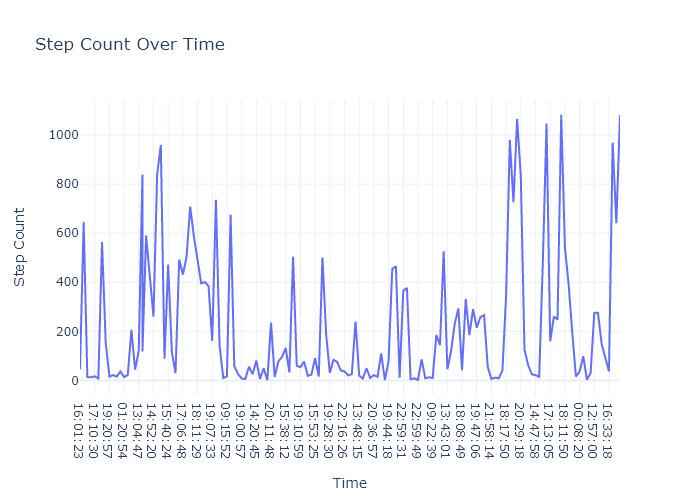

In [8]:
# Step Count Over Time
fig1 = px.line(data, x="Time",
               y="Step Count",
               title="Step Count Over Time")
fig1.show(renderer='png')

Now, let’s have a look at the distance covered over time:

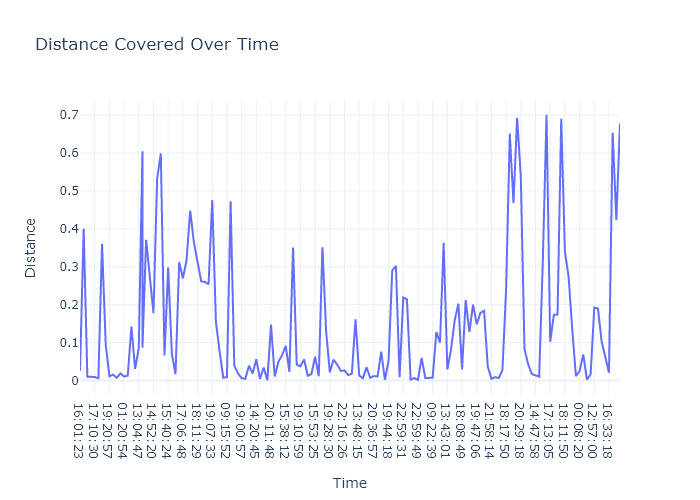

In [9]:
# Distance Covered Over Time
fig2 = px.line(data, x="Time",
               y="Distance",
               title="Distance Covered Over Time")
fig2.show(renderer='png')

Now, let’s have a look at my energy burned over time:

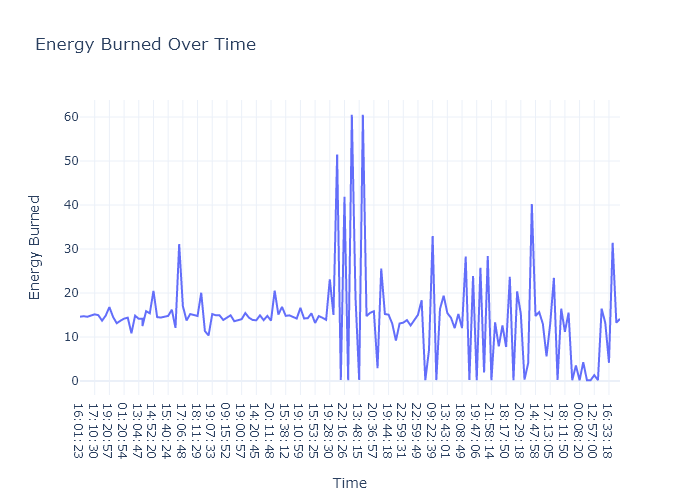

In [10]:
# Energy Burned Over Time
fig3 = px.line(data, x="Time",
               y="Energy Burned",
               title="Energy Burned Over Time")
fig3.show(renderer='png')

Let’s have a look at my walking speed over time:

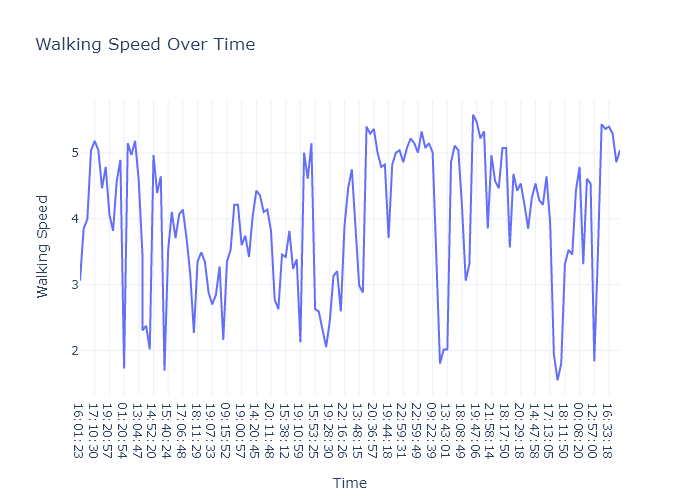

In [11]:
# Walking Speed Over Time
fig4 = px.line(data, x="Time",
               y="Walking Speed",
               title="Walking Speed Over Time")
fig4.show(renderer='png')

Now, let’s calculate and look at the average step counts per day:

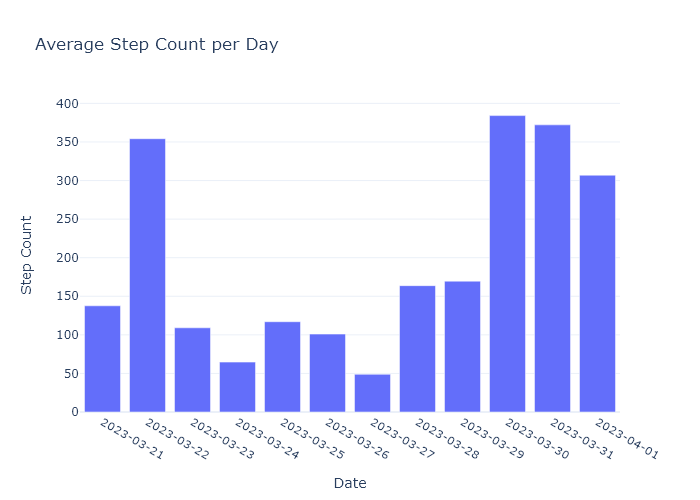

In [12]:
# Calculate Average Step Count per Day
average_step_count_per_day = data.groupby("Date")["Step Count"].mean().reset_index()

fig5 = px.bar(average_step_count_per_day, x="Date",
              y="Step Count",
              title="Average Step Count per Day")
fig5.update_xaxes(type='category')
fig5.show(renderer='png')

Now, let’s have a look at my walking efficiency over time:

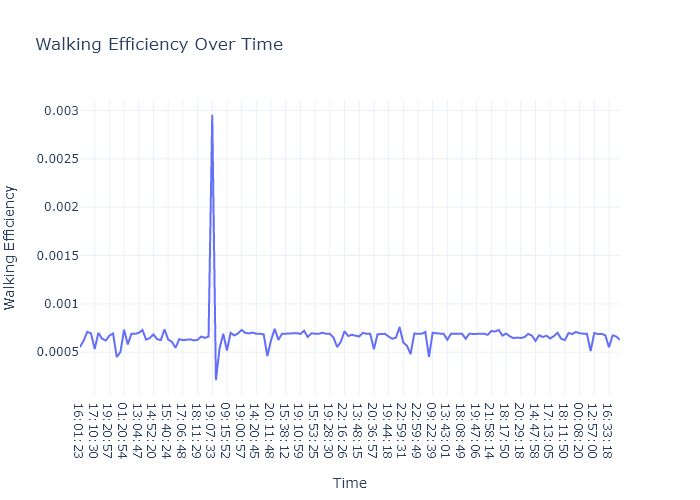

In [13]:
# Calculate Walking Efficiency
data["Walking Efficiency"] = data["Distance"] / data["Step Count"]

fig6 = px.line(data, x="Time",
               y="Walking Efficiency",
               title="Walking Efficiency Over Time")
fig6.show(renderer='png')

Now, let’s have a look at the step count and walking speed variations by time intervals:

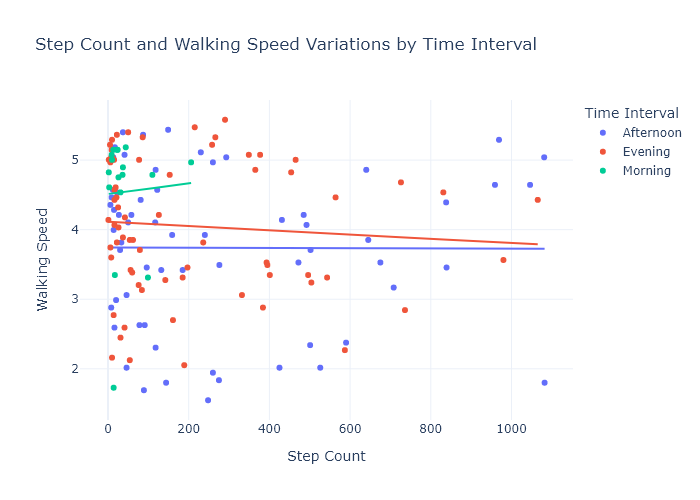

In [14]:
# Create Time Intervals
time_intervals = pd.cut(pd.to_datetime(data["Time"]).dt.hour,
                        bins=[0, 12, 18, 24],
                        labels=["Morning", "Afternoon", "Evening"], 
                        right=False)

data["Time Interval"] = time_intervals

# Variations in Step Count and Walking Speed by Time Interval
fig7 = px.scatter(data, x="Step Count",
                  y="Walking Speed",
                  color="Time Interval",
                  title="Step Count and Walking Speed Variations by Time Interval",
                  trendline='ols')
fig7.show(renderer='png')

Now, let’s compare the daily average of all the health and fitness metrics:

C:\Users\Илья\AppData\Local\Temp\ipykernel_9372\2736480411.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



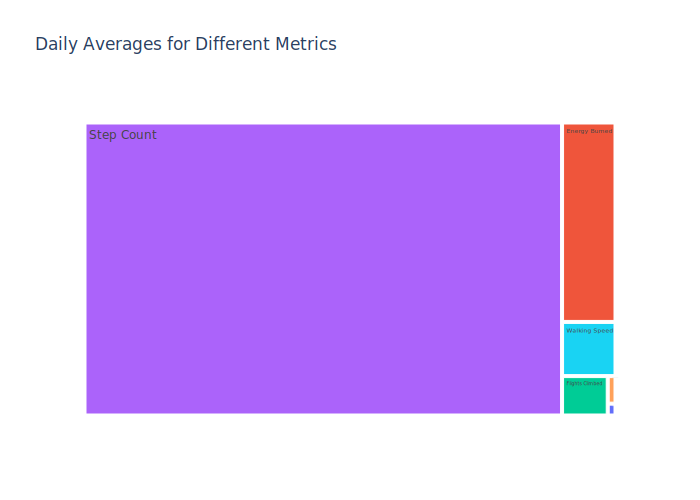

In [16]:
# Reshape data for treemap
daily_avg_metrics = data.groupby("Date").mean().reset_index()

daily_avg_metrics_melted = daily_avg_metrics.melt(id_vars=["Date"], 
                                                  value_vars=["Step Count", "Distance", 
                                                              "Energy Burned", "Flights Climbed", 
                                                              "Walking Double Support Percentage", 
                                                              "Walking Speed"])

# Treemap of Daily Averages for Different Metrics Over Several Weeks
fig = px.treemap(daily_avg_metrics_melted,
                 path=["variable"],
                 values="value",
                 color="variable",
                 hover_data=["value"],
                 title="Daily Averages for Different Metrics")
fig.show(renderer='svg')

The above graph represents each health and fitness metric as a rectangular tile. The size of each tile corresponds to the value of the metric and the colour of the tiles represents the metric itself. Hover data displays the exact average value for each metric when interacting with the visualization.

The Step Count metric dominates the visualization due to its generally higher numerical values compared to other metrics, making it difficult to visualize variations in the other metrics effectively. As the value of step count is higher than the value of all other metrics, let’s have a look at this visualization again without step counts:

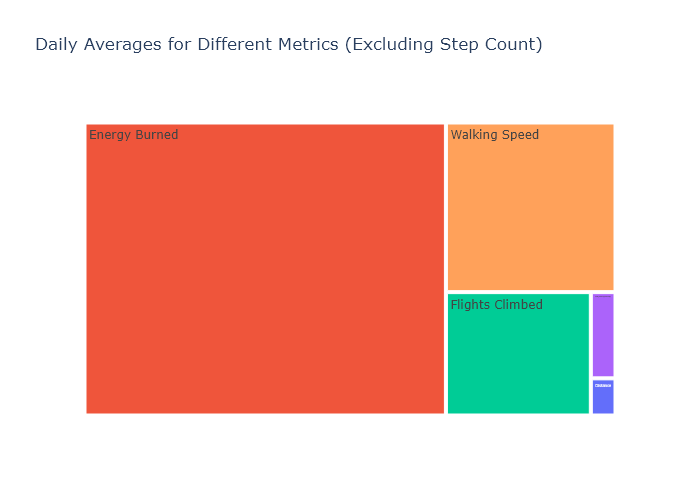

In [17]:
# Select metrics excluding Step Count
metrics_to_visualize = ["Distance", "Energy Burned", "Flights Climbed", 
                        "Walking Double Support Percentage", "Walking Speed"]

# Reshape data for treemap
daily_avg_metrics_melted = daily_avg_metrics.melt(id_vars=["Date"], value_vars=metrics_to_visualize)

fig = px.treemap(daily_avg_metrics_melted,
                 path=["variable"],
                 values="value",
                 color="variable",
                 hover_data=["value"],
                 title="Daily Averages for Different Metrics (Excluding Step Count)")
fig.show(renderer='png')